In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
final_conversions = pd.read_csv('Problem2_FInalConversions.txt', sep='\t', header=None, names=['time', 'user_id', 'products', 'cart_value'])

In [3]:
final_conversions.head()

,time,user_id,products,cart_value
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


In [4]:
final_conversions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        79795 non-null  object 
 1   user_id     79795 non-null  int64  
 2   products    79795 non-null  object 
 3   cart_value  79795 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [5]:
final_conversions.isna().sum()

time          0
user_id       0
products      0
cart_value    0
dtype: int64

NO NA values, we don't need any imputation

In [6]:
# number of users and number of observations
final_conversions['user_id'].nunique(), len(final_conversions)

(41009, 79795)

### Getting the time and date from column time

In [7]:
final_conversions['time']=pd.to_datetime(final_conversions['time'])

In [8]:
final_conversions['seconds'] = final_conversions['time'].dt.hour*3600+final_conversions['time'].dt.minute*60+final_conversions['time'].dt.second*1
final_conversions['date'] = final_conversions['time'].dt.date

In [9]:
final_conversions

,time,user_id,products,cart_value,seconds,date
0,2017-07-26 00:00:10.465,0,A293532,52.14,10,2017-07-26
1,2017-07-26 00:00:12.301,0,H209597,31.50,12,2017-07-26
2,2017-07-26 00:00:12.388,0,H211370,30.48,12,2017-07-26
3,2017-07-26 00:00:14.389,0,A282331,51.00,14,2017-07-26
4,2017-07-26 00:00:16.837,0,H211410,16.74,16,2017-07-26
...,...,...,...,...,...,...
79790,2017-07-26 23:09:08.202,9174973170462435039,K45766,89.96,83348,2017-07-26
79791,2017-07-26 23:44:19.505,9179943977593655876,V34738,24.66,85459,2017-07-26
79792,2017-07-26 23:53:15.661,9179943977593655876,H210000,21.64,85995,2017-07-26
79793,2017-07-26 23:13:02.550,9211905364441411643,A209343,73.00,83582,2017-07-26


In [10]:
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds)

In [11]:
final_conversions['date'].nunique()

1

There is only one unique day, so we can ignore the date of the purchase

### Understanding the User_id=0

In [12]:
final_conversions['user_id'].value_counts()

0                      20197
6999042003656970156       31
559346213618742389        22
1536590739380574003       20
9050159186422090402       20
                       ...  
8522862775873343143        1
8443454840705011439        1
8423897772245735599        1
8319355192124031198        1
9174973170462435039        1
Name: user_id, Length: 41009, dtype: int64

In [13]:
final_conversions.groupby('user_id')['user_id'].count()/len(final_conversions)*100

user_id
0                      25.311110
2941287703              0.001253
71023925710020          0.001253
394529638495081         0.001253
430191686443660         0.002506
                         ...    
9222344977727669611     0.001253
9222827786235385211     0.001253
9222849861047010228     0.001253
9223093682582171386     0.001253
9223308018930726010     0.001253
Name: user_id, Length: 41009, dtype: float64

25% of the data seems to have user_id =0. This maybe because they are guest users of the website. For us to get the conversion probabibilty of each user we need to treat this case separately. 

In [14]:
final_conversions_final = final_conversions[['user_id', 'cart_value']]

In [15]:
df_conversions = final_conversions_final.groupby('user_id').sum().reset_index()

In [16]:
df_conversions.head()

,user_id,cart_value
0,0,1375101.66
1,2941287703,75.34
2,71023925710020,89.96
3,394529638495081,94.34
4,430191686443660,84.70


In [17]:
df_conversions.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,41009.0,4.602452e+18,2.666834e+18,0.0,2.290596e+18,4.605989e+18,6.903664e+18,9.223308e+18
cart_value,41009.0,1.357895e+02,6.792351e+03,8.4,4.114000e+01,6.550000e+01,1.040000e+02,1.375102e+06


In [18]:
df_conversions[df_conversions['user_id']!=0].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,41008.0,4.602564e+18,2.666770e+18,2.941288e+09,2.290709e+18,4.605994e+18,6.903721e+18,9.223308e+18
cart_value,41008.0,1.022603e+02,1.827102e+02,8.400000e+00,4.114000e+01,6.550000e+01,1.040000e+02,7.765700e+03


We see that the guest user(user_id = 0) is causing issues with the mean.

Note that we haven't yet done any transformation which would lead to data leakage. We have done just a user level aggregation because we need to calculate the user level conversion probability

### Browsing data analysis

In [19]:
browsing_data = pd.read_csv('Problem2_Site_BrowingBehavior.txt', sep='\t', header=None, names=['time', 'user_id', 'website_section'])

In [20]:
browsing_data.head()

,time,user_id,website_section
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [21]:
browsing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535924 entries, 0 to 5535923
Data columns (total 3 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   time             object
 1   user_id          int64 
 2   website_section  object
dtypes: int64(1), object(2)
memory usage: 126.7+ MB


In [22]:
browsing_data.isna().sum()

time               0
user_id            0
website_section    0
dtype: int64

NO NA values here either, so no imputaion needed

### Getting the time and date

In [23]:
browsing_data['time']=pd.to_datetime(browsing_data['time'])

In [24]:
browsing_data['seconds'] = browsing_data['time'].dt.hour*3600+browsing_data['time'].dt.minute*60+browsing_data['time'].dt.second*1
browsing_data['date'] = browsing_data['time'].dt.date

In [25]:
browsing_data.head()

,time,user_id,website_section,seconds,date
0,2017-07-26 00:01:40.965,0,product,100,2017-07-26
1,2017-07-26 00:03:18.448,0,product,198,2017-07-26
2,2017-07-26 00:36:59.028,0,default,2219,2017-07-26
3,2017-07-26 00:41:17.273,0,product-listing-category,2477,2017-07-26
4,2017-07-26 00:45:39.197,0,content,2739,2017-07-26


In [26]:
browsing_data['date'].nunique()

1

There is only one unique day, so we can ignore the date of the purchase

In [27]:
# number of users and number of observations
browsing_data['user_id'].nunique(), len(browsing_data)

(516932, 5535924)

In [28]:
browsing_data[browsing_data['user_id']==4897178525819031450]

,time,user_id,website_section,seconds,date
678942,2017-07-26 01:52:39.451,4897178525819031450,product,6759,2017-07-26
711664,2017-07-26 01:49:47.851,4897178525819031450,product-listing-category,6587,2017-07-26
711665,2017-07-26 01:50:54.046,4897178525819031450,product,6654,2017-07-26
711666,2017-07-26 01:53:28.783,4897178525819031450,product,6808,2017-07-26
711667,2017-07-26 01:59:36.347,4897178525819031450,product-listing-category,7176,2017-07-26
724511,2017-07-26 01:49:21.052,4897178525819031450,product-listing-category,6561,2017-07-26
724512,2017-07-26 01:49:39.911,4897178525819031450,product-listing-category,6579,2017-07-26
724513,2017-07-26 01:52:26.576,4897178525819031450,cart,6746,2017-07-26
724514,2017-07-26 01:55:54.069,4897178525819031450,cart,6954,2017-07-26
747479,2017-07-26 01:56:37.990,4897178525819031450,product,6997,2017-07-26


In [29]:
df_conversions[df_conversions['user_id']==4897178525819031450]

,user_id,cart_value
21756,4897178525819031450,315.68


### Website section analysis

In [30]:
browsing_data['website_section'].value_counts()

product                     1855680
product-listing-category     823365
home                         752124
default                      552025
content                      488874
iroa                         428497
cart                         323325
product-listing-search       262481
shoplive                      35810
productNotFound                9333
product-listing-custom         2970
signupcomplete                 1312
mys                              63
error                            60
lorigreiner                       3
wishlist                          1
category                          1
Name: website_section, dtype: int64

In [31]:
browsing_data.groupby('website_section')['user_id'].nunique().sort_values(ascending=False)

website_section
product                     359689
home                        308359
product-listing-category    186316
content                     138935
default                     118147
product-listing-search       81544
cart                         71926
iroa                         68076
shoplive                     15526
productNotFound               5170
product-listing-custom        1111
signupcomplete                1032
mys                             15
error                           13
lorigreiner                      3
category                         1
wishlist                         1
Name: user_id, dtype: int64

### finding out the avg time the user spends on the website

In [32]:
df = browsing_data.groupby('user_id')['seconds'].mean().reset_index().rename(columns={'seconds':'avg_seconds'})

In [33]:
df['avg_time'] = df['avg_seconds'].apply(lambda x: convert(x))

In [34]:
df

,user_id,avg_seconds,avg_time
0,0,40249.000145,11:10:49
1,2,68875.200000,19:07:55
2,5,76168.000000,21:09:28
3,342391,39786.000000,11:03:06
4,420372,7143.500000,1:59:03
...,...,...,...
516927,9223331925947099393,54480.000000,15:08:00
516928,9223332159306941752,8648.000000,2:24:08
516929,9223343967635174542,12786.375000,3:33:06
516930,9223348075878229938,4346.400000,1:12:26


### creating dummies for website section

We see that product, home, product-listing-category has the highest footfall among viewers.

In [35]:
df_browsing = pd.get_dummies(browsing_data, columns = ['website_section'])

In [36]:
df_browsing.head()

,time,user_id,seconds,date,website_section_cart,website_section_category,website_section_content,website_section_default,website_section_error,website_section_home,...,website_section_lorigreiner,website_section_mys,website_section_product,website_section_product-listing-category,website_section_product-listing-custom,website_section_product-listing-search,website_section_productNotFound,website_section_shoplive,website_section_signupcomplete,website_section_wishlist
0,2017-07-26 00:01:40.965,0,100,2017-07-26,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2017-07-26 00:03:18.448,0,198,2017-07-26,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2017-07-26 00:36:59.028,0,2219,2017-07-26,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-07-26 00:41:17.273,0,2477,2017-07-26,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2017-07-26 00:45:39.197,0,2739,2017-07-26,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Aggregating it all on the user level

In [37]:
df_browsing_web_section = df_browsing.drop(columns=['seconds']).groupby('user_id').sum().reset_index()

In [38]:
len(df_browsing_web_section), len(df)

(516932, 516932)

In [39]:
df_b = pd.merge(df_browsing_web_section, df.drop(columns=['avg_seconds']), on = 'user_id', how='inner')

In [40]:
df_b.head()

,user_id,website_section_cart,website_section_category,website_section_content,website_section_default,website_section_error,website_section_home,website_section_iroa,website_section_lorigreiner,website_section_mys,website_section_product,website_section_product-listing-category,website_section_product-listing-custom,website_section_product-listing-search,website_section_productNotFound,website_section_shoplive,website_section_signupcomplete,website_section_wishlist,avg_time
0,0,84318.0,0.0,124665.0,141906.0,33.0,179270.0,86002.0,1.0,0.0,498322.0,215841.0,839.0,64991.0,1960.0,9471.0,259.0,1.0,11:10:49
1,2,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19:07:55
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21:09:28
3,342391,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11:03:06
4,420372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1:59:03


In [41]:
df_b['hour'] = pd.to_datetime(df_b['avg_time'], format='%H:%M:%S').dt.hour

In [42]:
df_b.head()

,user_id,website_section_cart,website_section_category,website_section_content,website_section_default,website_section_error,website_section_home,website_section_iroa,website_section_lorigreiner,website_section_mys,website_section_product,website_section_product-listing-category,website_section_product-listing-custom,website_section_product-listing-search,website_section_productNotFound,website_section_shoplive,website_section_signupcomplete,website_section_wishlist,avg_time,hour
0,0,84318.0,0.0,124665.0,141906.0,33.0,179270.0,86002.0,1.0,0.0,498322.0,215841.0,839.0,64991.0,1960.0,9471.0,259.0,1.0,11:10:49,11
1,2,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19:07:55,19
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21:09:28,21
3,342391,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11:03:06,11
4,420372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1:59:03,1


### Joining it all with the conversions data

In [43]:
df_conversions.head(2)

,user_id,cart_value
0,0,1375101.66
1,2941287703,75.34


In [44]:
df_b.head(2)

,user_id,website_section_cart,website_section_category,website_section_content,website_section_default,website_section_error,website_section_home,website_section_iroa,website_section_lorigreiner,website_section_mys,website_section_product,website_section_product-listing-category,website_section_product-listing-custom,website_section_product-listing-search,website_section_productNotFound,website_section_shoplive,website_section_signupcomplete,website_section_wishlist,avg_time,hour
0,0,84318.0,0.0,124665.0,141906.0,33.0,179270.0,86002.0,1.0,0.0,498322.0,215841.0,839.0,64991.0,1960.0,9471.0,259.0,1.0,11:10:49,11
1,2,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19:07:55,19


In [45]:
df_final = pd.merge(df_conversions, df_b.drop(columns = ['avg_time']), on = 'user_id', how='right')

In [46]:
df_final.head()

,user_id,cart_value,website_section_cart,website_section_category,website_section_content,website_section_default,website_section_error,website_section_home,website_section_iroa,website_section_lorigreiner,website_section_mys,website_section_product,website_section_product-listing-category,website_section_product-listing-custom,website_section_product-listing-search,website_section_productNotFound,website_section_shoplive,website_section_signupcomplete,website_section_wishlist,hour
0,0,1375101.66,84318.0,0.0,124665.0,141906.0,33.0,179270.0,86002.0,1.0,0.0,498322.0,215841.0,839.0,64991.0,1960.0,9471.0,259.0,1.0,11
1,2,NaN,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19
2,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
3,342391,NaN,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
4,420372,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [47]:
# percent of conversions
(len(df_final) - sum(df_final['cart_value'].isna())) / len(df_final)*100

7.90316714770995

In [48]:
df_final = df_final.fillna(0)

In [49]:
df_final['conversions'] = df_final['cart_value'].apply(lambda x:1 if x>0 else 0)

In [50]:
df_final['conversions'].value_counts()

0    476078
1     40854
Name: conversions, dtype: int64

In [51]:
# if we remove guest user

In [52]:
df_final1 = df_final[df_final['user_id']!=0]

WE USE both to do our analysis

In [53]:
# we drop cart_value because we created the variable converstions from that variable
df_final = df_final.drop(columns='cart_value')
df_final1 = df_final1.drop(columns='cart_value')

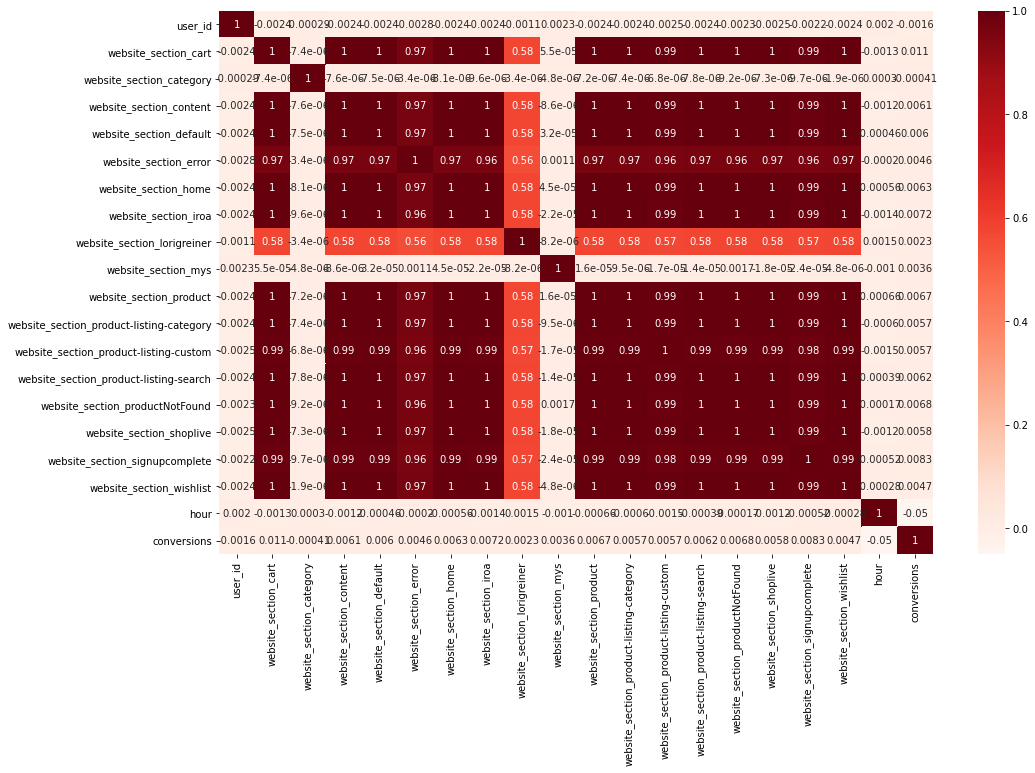

In [54]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_final.corr(), annot = True, cmap="Reds")
plt.show()

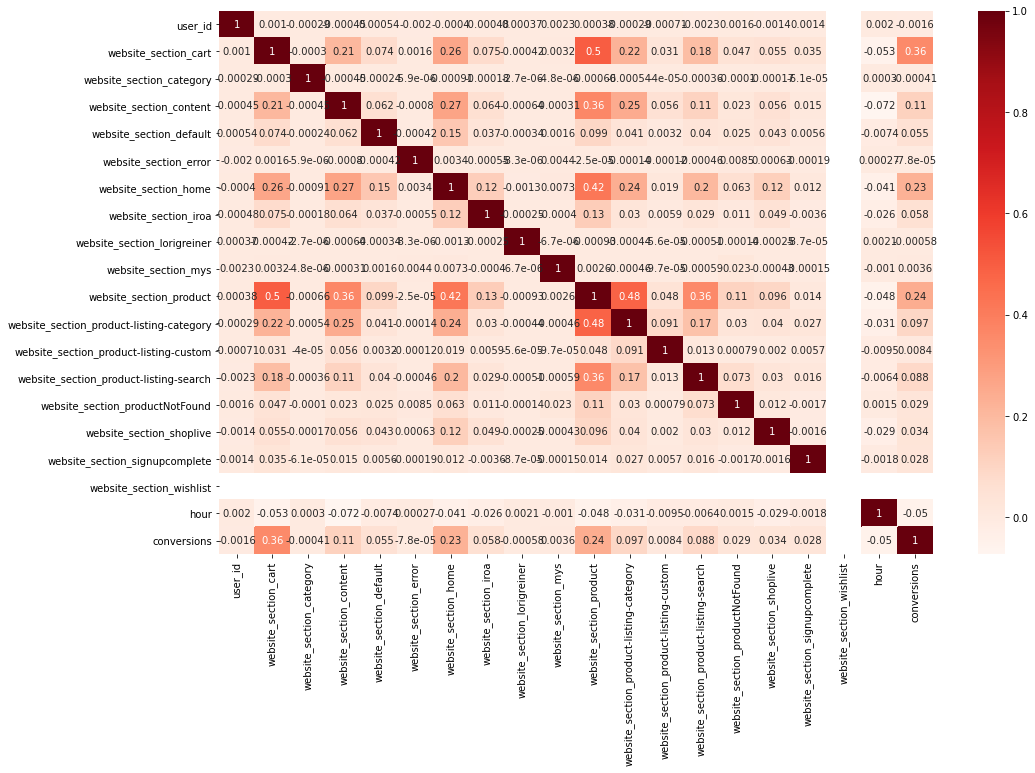

In [55]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_final1.corr(), annot = True, cmap="Reds")
plt.show()

We clearly see that removing the guest user affected the correlations a lot. We can try to reduce the impact by taking the average of all the variables for the case of guest user

In [56]:
n = len(df_browsing[df_browsing['user_id']==0])
for col in df_final.columns:
    if col not in ['user_id','hour', 'conversions']:
        df_final.loc[df_final['user_id']==0, col] = df_final.loc[df_final['user_id']==0, col]/n


In [57]:
df_final.head()

,user_id,website_section_cart,website_section_category,website_section_content,website_section_default,website_section_error,website_section_home,website_section_iroa,website_section_lorigreiner,website_section_mys,website_section_product,website_section_product-listing-category,website_section_product-listing-custom,website_section_product-listing-search,website_section_productNotFound,website_section_shoplive,website_section_signupcomplete,website_section_wishlist,hour,conversions
0,0,0.05989,0.0,0.088548,0.100794,0.000023,0.127333,0.061086,7.102883e-07,0.0,0.353952,0.153309,0.000596,0.046162,0.001392,0.006727,0.000184,7.102883e-07,11,1
1,2,0.00000,0.0,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.0,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,19,0
2,5,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,21,0
3,342391,0.00000,0.0,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000e+00,0.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,11,0
4,420372,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1,0


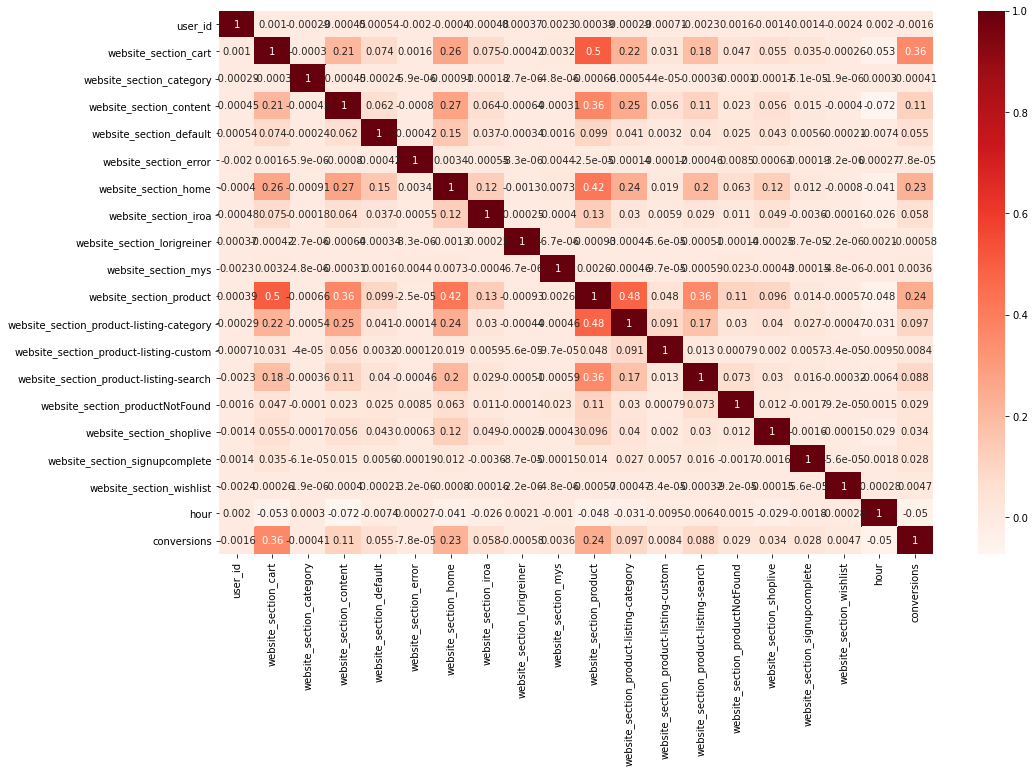

In [58]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_final.corr(), annot = True, cmap="Reds")
plt.show()

Now both df_final and df_final1 seem to be similar in the correlations

### train test split

In [59]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['conversions','user_id'],axis=1)
Y = df_final["conversions"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state =1)

In [60]:
X_train.head(3)

,website_section_cart,website_section_category,website_section_content,website_section_default,website_section_error,website_section_home,website_section_iroa,website_section_lorigreiner,website_section_mys,website_section_product,website_section_product-listing-category,website_section_product-listing-custom,website_section_product-listing-search,website_section_productNotFound,website_section_shoplive,website_section_signupcomplete,website_section_wishlist,hour
254218,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,23
146907,0.0,0.0,1.0,26.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6
140433,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [61]:
X_train.shape, X_test.shape

((413545, 18), (103387, 18))

## Applying Simple Logistic Regression 

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logistic_model = LogisticRegression(penalty='l2', class_weight='balanced', max_iter=500)

In [64]:
logistic_model.fit(X_train,Y_train)
# print(logistic_model.coef_)
y_pred = logistic_model.predict(X_train)

print('Accuracy for Logistic against Train:', metrics.accuracy_score(Y_train,y_pred ))

logistic_model.fit(X_train,Y_train)
# print(logistic_model.coef_)
y_pred = logistic_model.predict(X_test)

print('Accuracy for Logistic against Test:', metrics.accuracy_score(Y_test,y_pred))

Accuracy for Logistic against Train: 0.9032705026055206
Accuracy for Logistic against Test: 0.9012738545465098


In [65]:
len(Y_train), sum(Y_train), sum(y_pred)

(413545, 32657, 14106)

### Getting the prediction probability/scores

In [67]:
logistic_model_1 = LogisticRegression(penalty='l2', class_weight='balanced', max_iter=500)
logistic_model_1.fit(X_train,Y_train)
y_pred_probability = logistic_model_1.predict_proba(X_test)

<AxesSubplot:>

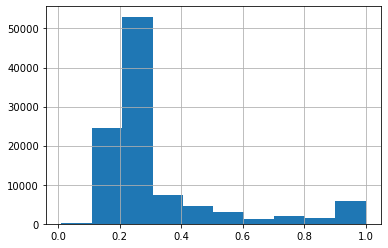

In [68]:
pd.Series(y_pred_probability[:,1]).hist()

In [69]:
metrics.f1_score(Y_test, y_pred, average='weighted')
# (precision and recall harmonic mean)

0.9127709979885921

In [70]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.94     95190
           1       0.43      0.74      0.54      8197

    accuracy                           0.90    103387
   macro avg       0.70      0.83      0.74    103387
weighted avg       0.93      0.90      0.91    103387



In [71]:
metrics.roc_auc_score(Y_test, y_pred)

0.8265895823078101

### getting a better view of each variable and its impact

In [72]:
import statsmodels.api as sm

In [76]:
x_train_with_cons = sm.add_constant(X_train)
logit_mod = sm.Logit(Y_train, x_train_with_cons)
logit_res = logit_mod.fit()

logit_res.summary()

C:\Users\ghvi0001\Anaconda3\envs\lta_geo\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


         Current function value: 0.225795
         Iterations: 35


C:\Users\ghvi0001\Anaconda3\envs\lta_geo\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            conversions   No. Observations:               413545
Model:                          Logit   Df Residuals:                   413526
Method:                           MLE   Df Model:                           18
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                  0.1826
Time:                        22:19:35   Log-Likelihood:                -93376.
converged:                      False   LL-Null:                   -1.1424e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9658      0.014   -215.281      0.000      -2.993      -2.939
website_section_cart                         0.4601      0.004    126.077      0.000       0.453       0.467
website_section_category                   -14.9613   8638.843     -0.002      0.999   -1.69e+04    1.69e+04
website_section_content                     -0.0090      0.003     -3.348      0.001      -0.014      -0.004
website_section_default                      0.0034      0.001      3.302      0.001       0.001       0.005
website_section_error                       -0.0753      0.741     -0.102      0.919      -1.528       1.377
website_section_home                         0.1872      0.003     56.636      0.000       0.181       0.194
website_section_iroa                         0.0138      0.002      6.864      0.000       0.010       0.018
website_section_lorigreiner                -10.6116   1032.177     -0.010      0.992   -2033.642    2012.418
website_section_mys                         -0.5019      0.717     -0.700      0.484      -1.908       0.904
website_section_product                      0.0192      0.001     14.131      0.000       0.017       0.022
website_section_product-listing-category    -0.0331      0.002    -14.946      0.000      -0.037      -0.029
website_section_product-listing-custom      -0.1112      0.053     -2.082      0.037      -0.216      -0.007
website_section_product-listing-search      -0.0215      0.004     -5.441      0.000      -0.029      -0.014
website_section_productNotFound              0.0199      0.025      0.782      0.434      -0.030       0.070
website_section_shoplive                    -0.0257      0.014     -1.865      0.062      -0.053       0.001
website_section_signupcomplete               0.6394      0.096      6.688      0.000       0.452       0.827
website_section_wishlist                    -0.5746   6.84e+06   -8.4e-08      1.000   -1.34e+07    1.34e+07
hour                                        -0.0144      0.001    -15.916      0.000      -0.016      -0.013
============================================================================================================
"""

We can see that overall the logistic model performs well on predicting 0 but not so well with predicting 1

## Gradient Boost

In [77]:
from lightgbm import LGBMClassifier

In [78]:
clf = LGBMClassifier()
clf.fit(X_train, Y_train)

LGBMClassifier()

In [86]:
y_pred = clf.predict(X_train)

print('Accuracy for GBM against Train:', metrics.accuracy_score(Y_train,y_pred ))

y_pred = clf.predict(X_test)

print('Accuracy for GBM against Test:', metrics.accuracy_score(Y_test,y_pred))

Accuracy for GBM against Train: 0.9359924554764294
Accuracy for GBM against Test: 0.933115382011278


In [83]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     95190
           1       0.60      0.47      0.53      8197

    accuracy                           0.93    103387
   macro avg       0.78      0.72      0.75    103387
weighted avg       0.93      0.93      0.93    103387



In [84]:
# This gives a slightly better precision than before

In [88]:
clf = LGBMClassifier()
clf.fit(X_train, Y_train)
y_pred_probability = clf.predict_proba(X_test)

<AxesSubplot:>

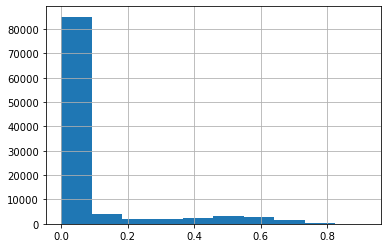

In [89]:
pd.Series(y_pred_probability[:,1]).hist()